In [616]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [617]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data cleaning

In [620]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [621]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [622]:
df.loc[[105]] # return the mentioned row in data frame

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
105,14,09,2012,22,76,26,8.3,47.4,1.1,7,0.4,1.6,0.1,not fire


In [623]:
df.loc[105] # return the row in series

day                     14
month                   09
year                  2012
Temperature             22
 RH                     76
 Ws                     26
Rain                   8.3
FFMC                  47.4
DMC                    1.1
DC                       7
ISI                    0.4
BUI                    1.6
FWI                    0.1
Classes        not fire   
Name: 105, dtype: object

In [624]:
df.loc[[100,120]] # returning the multiple mentioned rows

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
100,09,09,2012,30,77,15,1,56.1,2.1,8.4,0.7,2.6,0.2,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [625]:
df.loc[5:25] # slicing of rows, end row inclusive

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire
10,11,06,2012,31,65,14,0,84.5,12.5,54.3,4,15.8,5.6,fire
11,12,06,2012,26,81,19,0,84,13.8,61.4,4.8,17.7,7.1,fire
12,13,06,2012,27,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire
13,14,06,2012,30,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire
14,15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1,not fire


In [626]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [627]:
df.loc[115:140]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,09,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0.0
116,25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,0.0
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0.0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0.0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [628]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [629]:
df.dropna(inplace=True,axis=0)

In [630]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [631]:
df.reset_index(drop=True,inplace=True)

In [632]:
df.loc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                 1.0
Name: 122, dtype: object

In [633]:
df.drop(122,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)# dropping the 2nd header row

In [634]:
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1.0
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1.0


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [636]:
# stripping the column name
df.columns = df.columns.str.strip()

In [637]:
df['Temperature'] = df['Temperature'].astype(int)
df['Rain'] = df['Rain'].astype(float)

In [638]:
df.loc[(df['Temperature']==29) & (df['Rain']>=1.3)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
124,03,06,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(2), int32(1), object(12)
memory usage: 27.7+ KB


In [640]:
df['Region'] = df['Region'].astype(int)

In [641]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## change the required columns as integer datatype


In [643]:
df[['month','day','year', 'Temperature', 'RH', 'Ws']] = df[['month','day','year', 'Temperature', 'RH', 'Ws']].astype(int)

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 22.0+ KB


In [645]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [646]:
## changing the other columns to float data type

objects = [feature for feature in df.columns if df[feature].dtypes=='O']
objects

['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [647]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [648]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [649]:
# saving the dataset into CSV format
df.to_csv('algerian_cleaned.csv',index=False)

## Exploratory data analysis

In [651]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [652]:
df1 = df.iloc[:,3:]
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [653]:
df1['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [654]:
df1['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [655]:
# stripping the rows
df1['Classes'] = df['Classes'].str.strip()
df1['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [656]:
df1['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [657]:
# encoding the categories in column Categories
df1.loc[df1['Classes']=='not fire','Classes']=0
df1.loc[df1['Classes']=='fire','Classes']=1
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [658]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [659]:
# encoding the categories using numpy

# df1['Classes'] = np.where(df1['Classes']=='not fire',0,1)
# df1.Classes.value_counts()

In [660]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(4), object(1)
memory usage: 19.1+ KB


In [661]:
df1['Classes'] = df1['Classes'].astype(int)

In [662]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


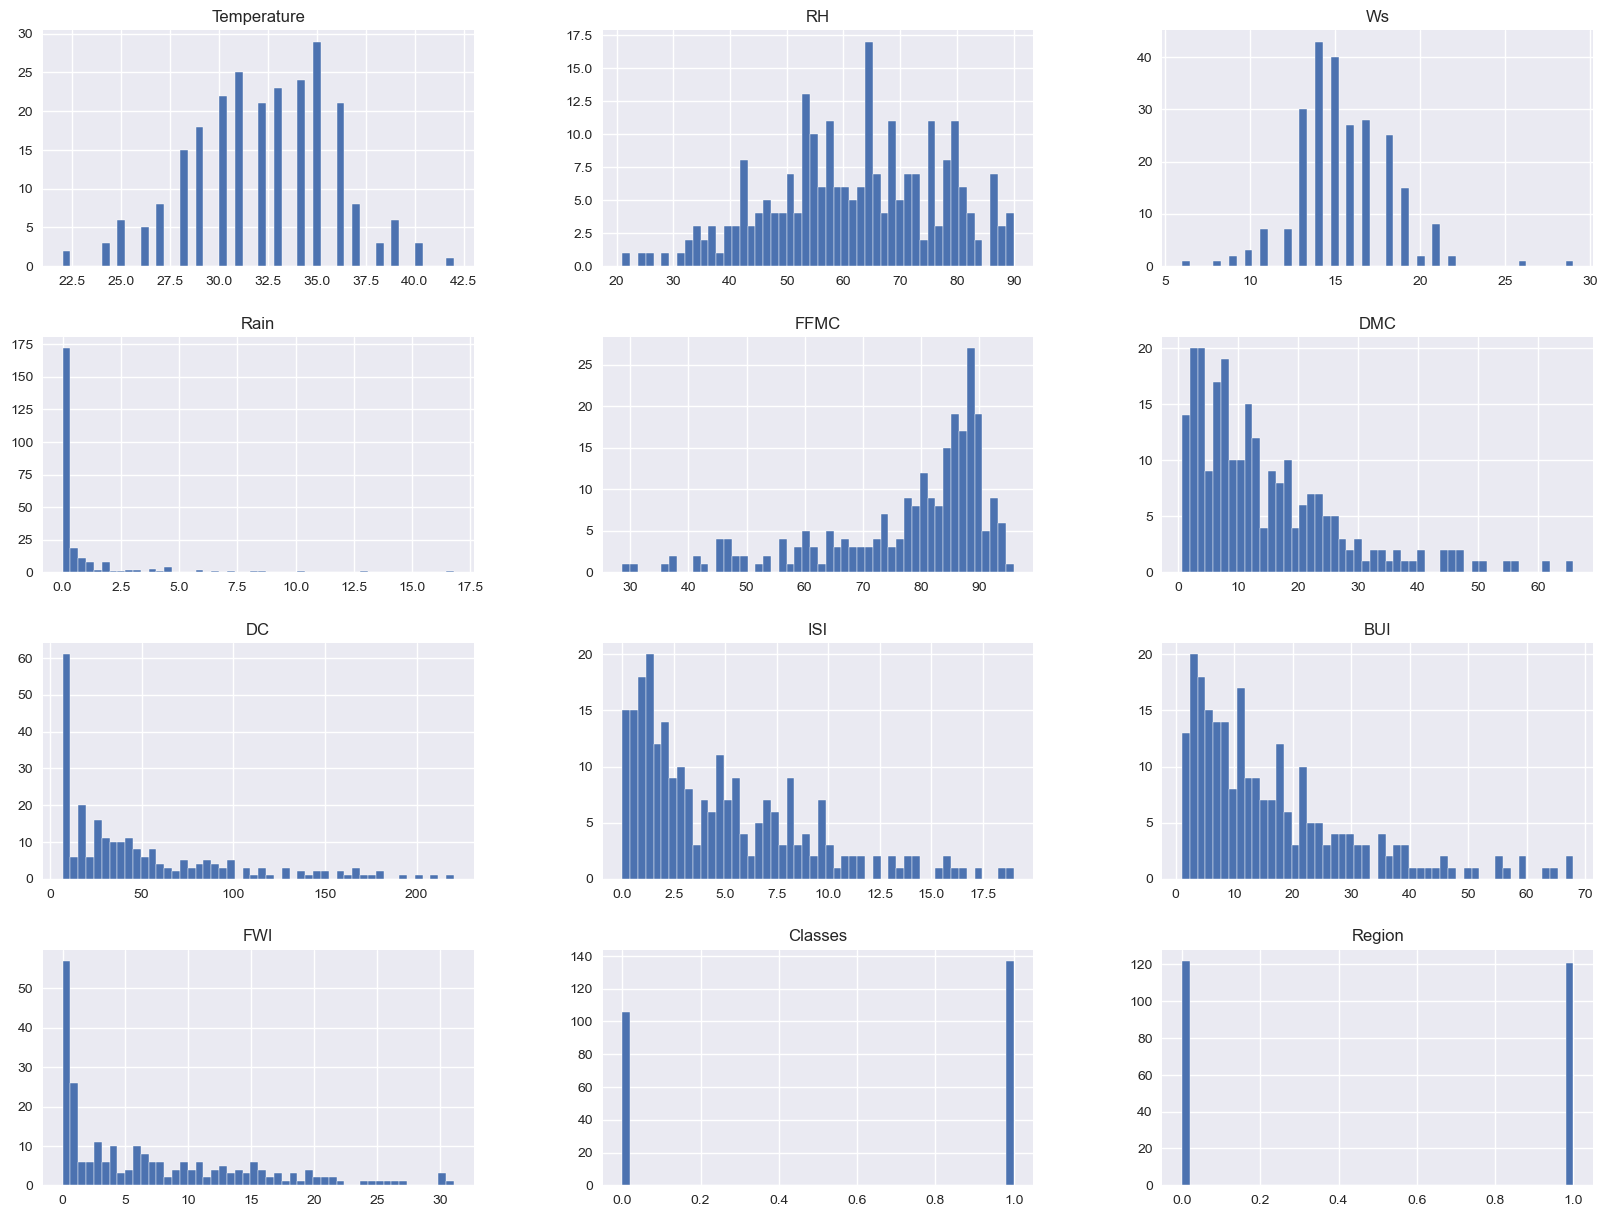

In [663]:
# plot density for all features
plt.style.use('seaborn-v0_8')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [664]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [665]:
# percentage of piechart
df1['Classes'].value_counts(normalize=True) # when ever we use normalize it will give the percentage distribution of classes

Classes
1    0.563786
0    0.436214
Name: proportion, dtype: float64

In [666]:
percentage = df1['Classes'].value_counts(normalize=True)*100

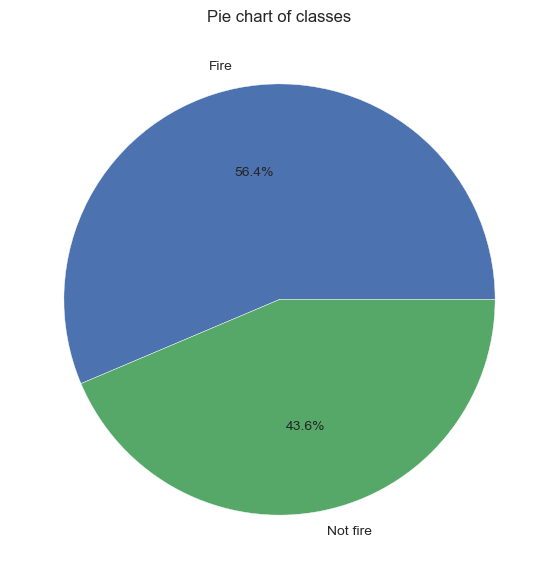

In [667]:
# plotting the pie chart
classlables = ['Fire', 'Not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlables,autopct='%1.1f%%')
plt.title("Pie chart of classes")
plt.show()

In [668]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


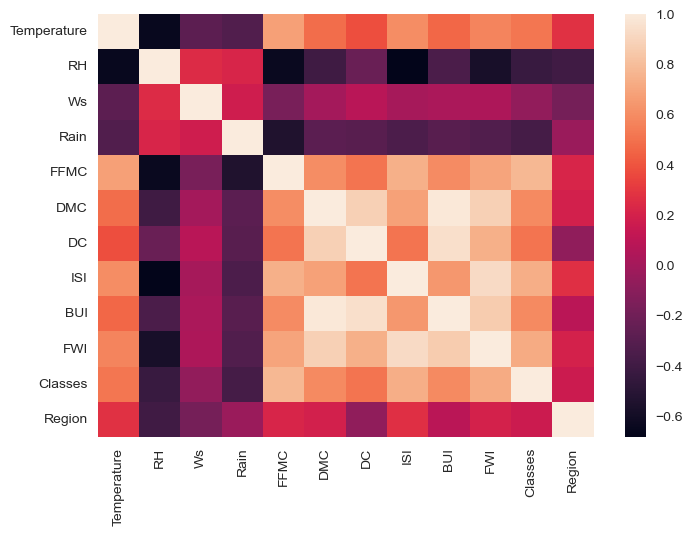

In [669]:
sns.heatmap(df1.corr())
plt.show()

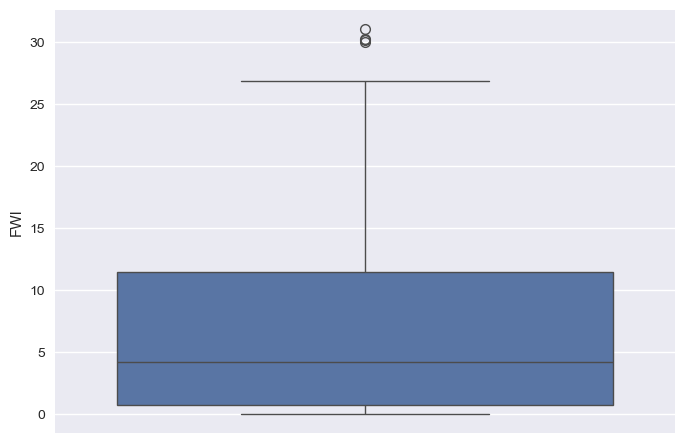

In [670]:
## box plots
sns.boxplot(df1['FWI'])
plt.show()

In [671]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

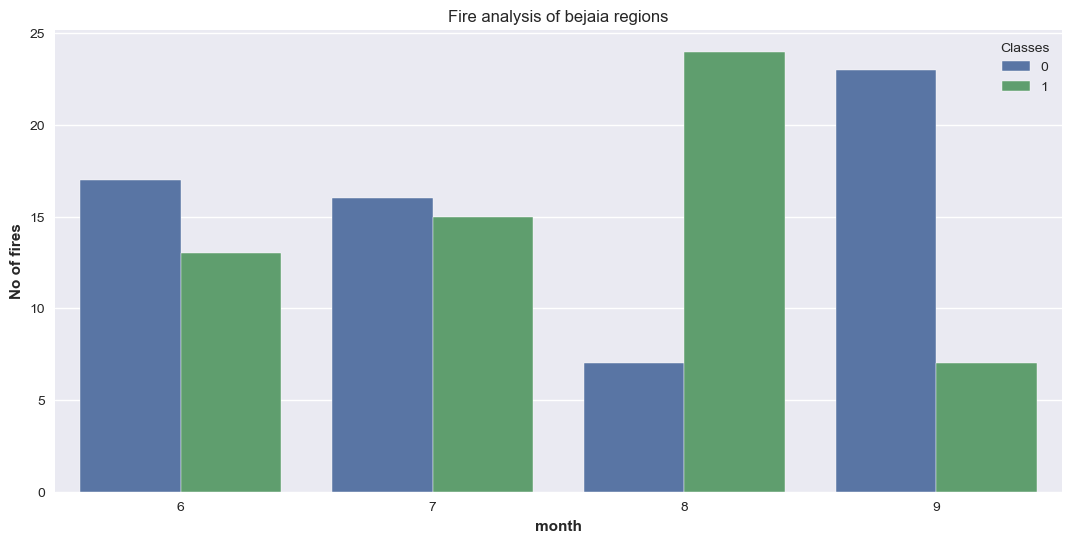

In [672]:
# monthly fire analysis
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('No of fires',weight='bold')
plt.xlabel('month',weight='bold')
plt.title('Fire analysis of bejaia regions')
plt.show()

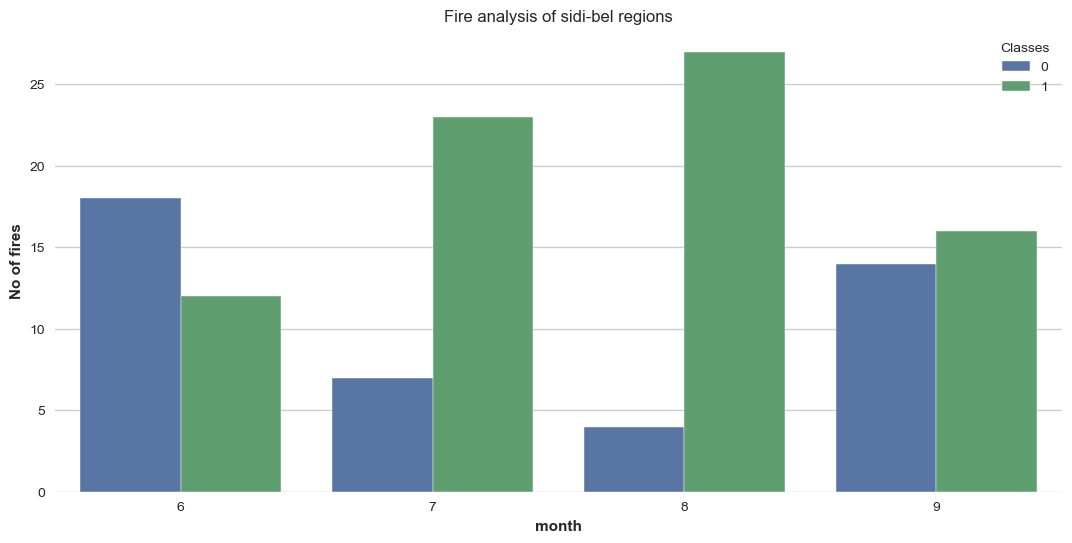

In [673]:
# monthly fire analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('No of fires',weight='bold')
plt.xlabel('month',weight='bold')
plt.title('Fire analysis of sidi-bel regions')
plt.show()

## Feature Selection

In [675]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [676]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [677]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [678]:
X= df1.drop('FWI',axis=1)
y = df1['FWI']

In [679]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [680]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [681]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [682]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [683]:
# need to remove the features which were highly positive correleated among independent features
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


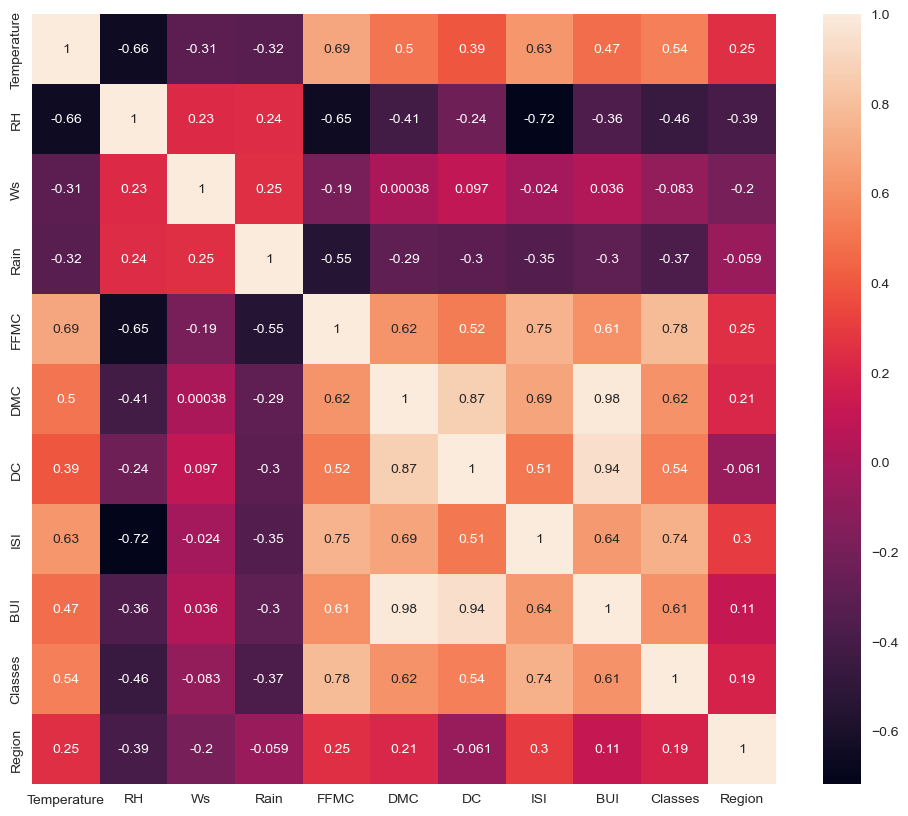

In [684]:
# check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [685]:
corr.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [686]:
corr.iloc[1,0]

-0.6560952065209624

In [687]:
def Correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [688]:
## threshold value can be set by domain expertise
corr_features = Correlation(X_train,0.85)

In [689]:
# dropping the features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Model Training

In [691]:
# feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

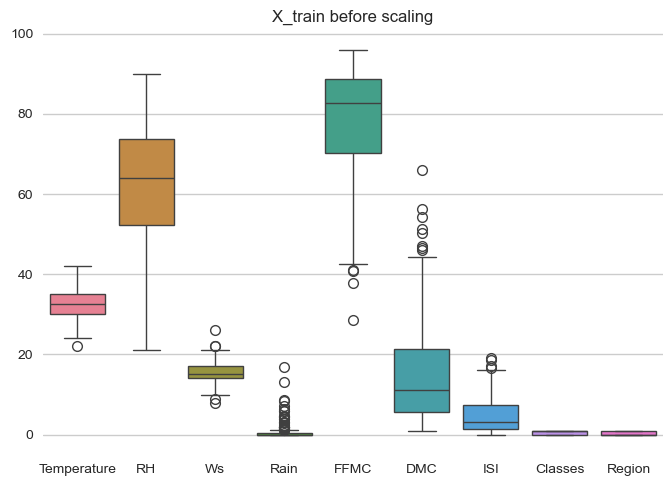

In [692]:
# box plot to understand effect of standard scaller
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.show()

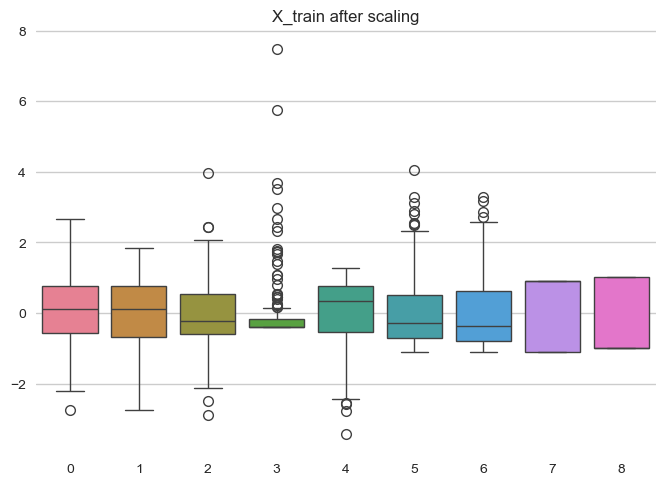

In [693]:
sns.boxplot(data=X_train_s)
plt.title('X_train after scaling')
plt.show()

## Linear regression model

In [695]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_s,y_train)
y_pred = linreg.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)

mean_absolute_error 0.9939450225331384
mean_squared_error 1.7391885638204776
r2_score 0.9607056657860651


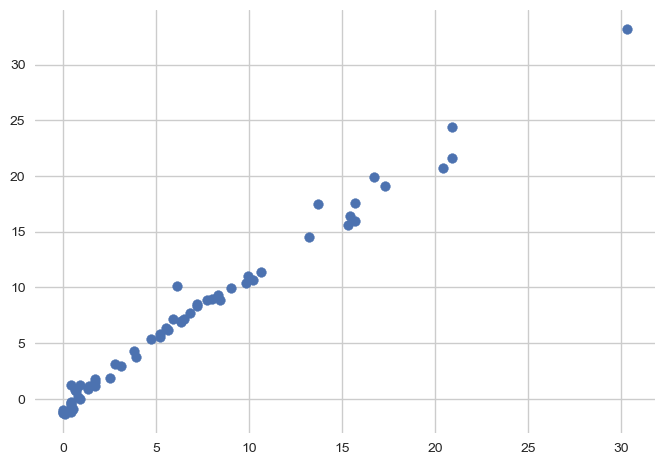

In [696]:
plt.scatter(y_test,y_pred)
plt.show()

## Lasso()

In [698]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lass = Lasso()
lass.fit(X_train_s,y_train)
y_pred = lass.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)

mean_absolute_error 0.9605020166901075
mean_squared_error 1.3589274038116663
r2_score 0.9692970913627958


## ridge

In [700]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge = Ridge()
ridge.fit(X_train_s,y_train)
y_pred = ridge.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)

mean_absolute_error 0.9862070802884408
mean_squared_error 1.6975754626951085
r2_score 0.9616458508455313


## ElasticNet

In [702]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
els = ElasticNet()
els.fit(X_train_s,y_train)
y_pred = els.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)

mean_absolute_error 1.6511868133560939
mean_squared_error 4.064436888454821
r2_score 0.9081701979826986


# Cross validation and hyper parameter tunning

In [704]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_s,y_train)

LassoCV(cv=5)

In [705]:
lassocv.alpha_

0.05725391318234408

In [706]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [707]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mean_absolute_error 0.9630024676566873
mean_squared_error 1.721235206913287
r2_score 0.9611112947220234


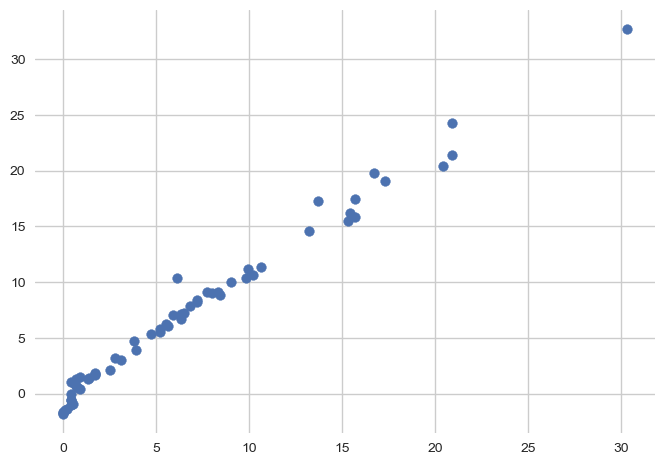

In [708]:
y_pred = lassocv.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)
plt.scatter(y_test,y_pred)
plt.show()

## Ridge CV

In [710]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_s,y_train)
y_pred = ridgecv.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)

mean_absolute_error 0.9862070802884408
mean_squared_error 1.6975754626951085
r2_score 0.9616458508455313


In [711]:
ridgecv.alpha_

1.0

In [712]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [713]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elastic Net CV

In [715]:
from sklearn.linear_model import ElasticNetCV
elasticv = ElasticNetCV(cv=5)
elasticv.fit(X_train_s,y_train)
y_pred = elasticv.predict(X_test_s)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('r2_score',score)

mean_absolute_error 0.9658446127981586
mean_squared_error 1.6125671690762815
r2_score 0.9635664846226284


In [805]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))